<a href="https://colab.research.google.com/github/samuel-haddad/Simulations/blob/main/distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distributions
Sources: 
- https://www.datadriveninvestor.com/2020/05/20/simulating-popular-distributions-in-python/
-https://towardsdatascience.com/bernoulli-distribution-with-python-from-scratch-89fda3c822b
- Curso Estatística para Ciência de Dados:
Teoria e Prática com Python (Prof. Dr. Francisco Rodrigues)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random # biblioteca para gerar números aleatórios

#from scipy import stats
from scipy.stats import bernoulli

# plots setup
plt.rcParams['axes.titlepad']=15

rc = {'axes.titlesize':18,
      'axes.titleweight':'bold',
      'axes.labelsize':12,
      }

sns.set_context(context='notebook', rc=rc)
sns.set_style("whitegrid", rc=rc)

## Standard Normal Distribution
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

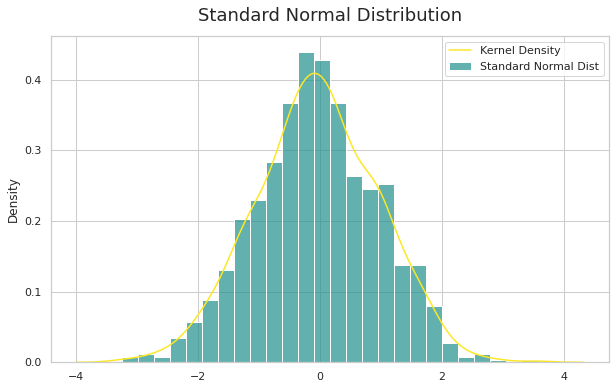

In [2]:
# set random number for reproducibility
np.random.seed(123)

# simulate normal dist (Std normal: loc = center of distribution and scale = std deviation)
x = np.random.normal(size=1000, loc = 0, scale = 1)

# plot
fig = plt.figure(figsize=(10,6))

ax = sns.histplot(data = x, stat='density', alpha=0.7, color='#21918c')
ax = sns.kdeplot(x, color='#fde725')

plt.legend(labels=['Kernel Density','Standard Normal Dist'])
plt.title("Standard Normal Distribution")
plt.show(block=False)

## Bernoulli Distribution
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html
https://github.com/franciscoicmc/probabilidades/blob/main/aula14-montecarlo.ipynb

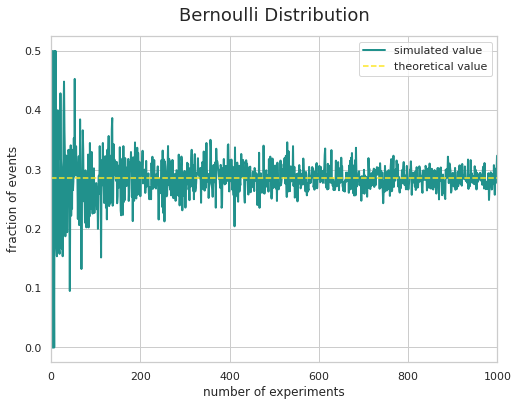

Theoretical value of probability: 0.286


In [3]:
# set random number for reproducibility
np.random.seed(123)

# bernoulli simulation
p = 0.3 # probability of occurrence of the event
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
x = bernoulli.rvs(p,size=1000) 

# theorical value
valor_teorico = 0
for i in x:
    if (i == 1):
        valor_teorico = valor_teorico + 1
valor_teorico = valor_teorico/len(x)


vp = [] # list that stores the fraction of occurrences as a function of the number of nsim simulations
vsim = [] # list that stores the number of simulations
Nmax = 1000 # maximum number of simulations
for nsim in np.arange(1,Nmax,1):
    n = 0 # number of occurrences of events
    for i in range(1,nsim):
        position = random.randint(0,len(x)-1)
        if(x[position] == 1):
            n = n + 1        
    vp.append(n/nsim)
    vsim.append(nsim)

plt.figure(figsize=(8,6))
plt.plot(vsim, vp, linestyle='-', color="#21918c", linewidth=2,label = 'simulated value')
plt.axhline(y=valor_teorico, color='#fde725', linestyle='--', label = 'theoretical value')
plt.title("Bernoulli Distribution")
plt.ylabel("fraction of events")
plt.xlabel("number of experiments")
plt.xlim([0.0, Nmax])
#plt.ylim([0.0, 1.0])
plt.legend()
plt.show(True) 

print('Theoretical value of probability:', valor_teorico)

## Binomial Distribution
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html

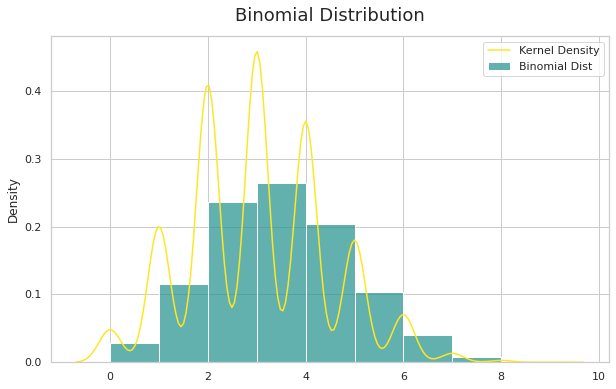

In [46]:
n, p = 10, .3
s = np.random.binomial(n, p, 10000)

# plot
fig = plt.figure(figsize=(10,6))

ax = sns.histplot(data = s, stat='density', alpha=0.7, color='#21918c', binwidth=1,)
ax = sns.kdeplot(s, color='#fde725')

plt.legend(labels=['Kernel Density','Binomial Dist'])
plt.title("Binomial Distribution")
plt.show(block=False)